<div style="direction:rtl;line-height:300%;">
<font face="XB Zar" size=5>
<div align=center>
<font face="B Titr" size=5>
<p></p><p></p>
بسمه تعالی
<p></p>
</font>
<p></p>
<font>
<br>
درس بازیابی پیشرفته اطلاعات
<br>
مدرس: دکتر بیگی
</font>
<p></p>
<br>
<font>
<b>تمرین سوم</b>
</font>
<br>
<br>
موعد تحویل: ۴ دی <br>
<br>
<br>
<br>
<font>
دانشگاه صنعتی شریف
<br>
دانشکده مهندسی کامپیوتر
<br>
<br>
</font>
</div>
</font>
</div>

<span style="color: red;">
<div dir='rtl'>

<b> نام و نام‌‌خانوادگی: </b>
Naser Kazemi

<b> شماره دانشجویی: </b>
99102059

<b> لینک colab: https://drive.google.com/file/d/1xU4IY74Kp9wnPIJYXlVhObIWJwOgITNH/view?usp=sharing</b>

<!-- UPLOAD YOUR NOTEBOOK TO GOOGLE COLAB AND MAKE SURE TO RUN ALL OF ITS CELLS -->
</div>
</span>

<div dir='rtl'>
<h1>
مقدمه
</h1>
<p>
در این تمرین قصد داریم به مباحث زیر بپردازیم:
<li> embedding </li>
<li> کلاسه‌بندی متن </li>
<li> کاهش ابعاد </li>
<li> خوشه‌بندی متن و هرس‌کردن خوشه‌ها</li>

دیتاست این تمرین از دیتاست‌های kaggle انتخاب شده‌است و لینک آن در بخش اول تمرین در اختیار شما قرار داده شده است.

کتابخانه‌های مورد نظرتان را هم می‌توانید در اولین سل نوت‌بوک فراخوانی کنید.
</p>
</div>

In [1]:
!pip install opendatasets
!pip install kaggle
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199774 sha256=8fdb957f940fa31fc0185840a250b80b7f3f3bf23faa16ff22bbba4b8a2d506e
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [2]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"naserkazemi02","key":"5cc940e9248af4762e7bdb1b8af8fc47"}


import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [3]:
import opendatasets as od
import kaggle
import pandas as pd
import numpy as np
import string
import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm
import fasttext
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.feature_extraction.text import CountVectorizer
from torch.utils.data import Dataset, DataLoader
import torch

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

<div dir='rtl'>
<h1>1.
دریافت و آماده‌سازی دیتاست
</h1>
<p>
دیتاست استفاده شده در این تمرین، مجموعه‌ای عناوین، خلاصه، و ژانر چندین کتاب است.
این دیتاست در kaggle موجود است.
ابتدا این دیتاست را با استفاده از kaggle api دریافت کنید و سپس آن را لود کنید.
<br/>
لینک دیتاست: https://www.kaggle.com/datasets/athu1105/book-genre-prediction
<br>
<i>در صورتی که با خطای 443 مواجه شدید، یا از پراکسی استفاده کنید یا از کولب.</i>
</p>
</div>

In [4]:
# Download Dataset (https://www.kaggle.com/datasets/athu1105/book-genre-prediction) Using Kaggle API
!kaggle datasets download -d athu1105/book-genre-prediction

  0% 0.00/3.73M [00:00<?, ?B/s]
100% 3.73M/3.73M [00:00<00:00, 139MB/s]


In [5]:
!unzip book-genre-prediction.zip

Archive:  book-genre-prediction.zip
  inflating: data.csv                


In [ ]:
!ls

book-genre-prediction.zip  data.csv  sample_data


In [6]:
# Load Dataset into df
df = pd.read_csv("data.csv")
df.head()

index                      title    genre  \
0      0          Drowned Wednesday  fantasy   
1      1              The Lost Hero  fantasy   
2      2  The Eyes of the Overworld  fantasy   
3      3            Magic's Promise  fantasy   
4      4             Taran Wanderer  fantasy   

                                             summary  
0   Drowned Wednesday is the first Trustee among ...  
1   As the book opens, Jason awakens on a school ...  
2   Cugel is easily persuaded by the merchant Fia...  
3   The book opens with Herald-Mage Vanyel return...  
4   Taran and Gurgi have returned to Caer Dallben...

In [7]:
# Perform data cleaning and eda (you can add cells here)
# Function to clean text data
def clean_text(text):
    # Removing special characters and extra spaces
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply text cleaning to the 'summary' column
df['summary'] = df['summary'].apply(clean_text)

df = df.drop(columns=['index'])
df.head()

title    genre  \
0          Drowned Wednesday  fantasy   
1              The Lost Hero  fantasy   
2  The Eyes of the Overworld  fantasy   
3            Magic's Promise  fantasy   
4             Taran Wanderer  fantasy   

                                             summary  
0  Drowned Wednesday is the first Trustee among t...  
1  As the book opens Jason awakens on a school bu...  
2  Cugel is easily persuaded by the merchant Fian...  
3  The book opens with HeraldMage Vanyel returnin...  
4  Taran and Gurgi have returned to Caer Dallben ...

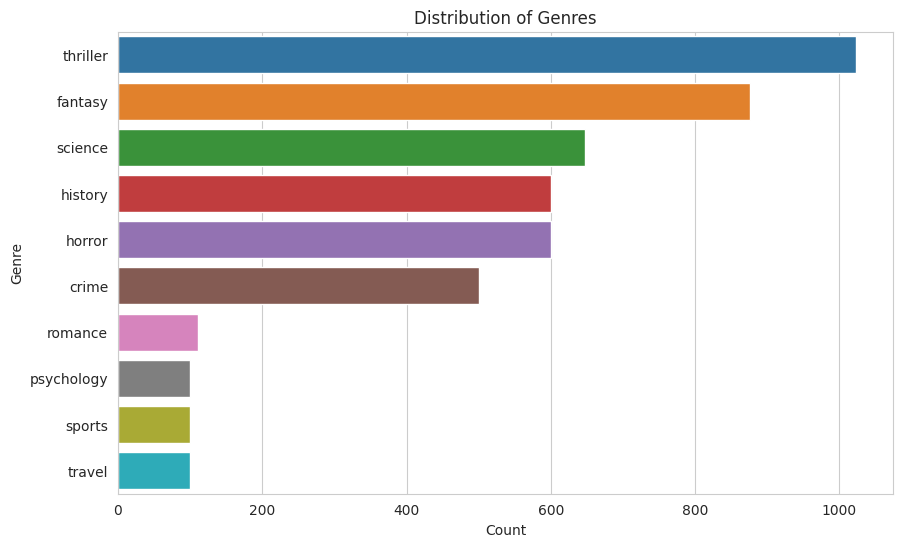

In [8]:
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting the distribution of genres
plt.figure(figsize=(10, 6))
sns.countplot(y="genre", data=df, order = df['genre'].value_counts().index)
plt.title("Distribution of Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

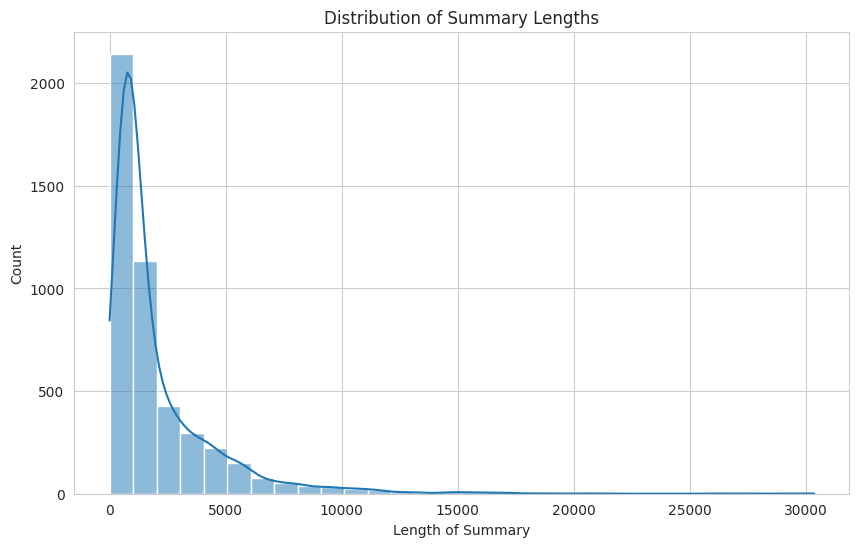

In [ ]:
# Plotting the distribution of summary lengths
summary_lengths = df['summary'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(summary_lengths, bins=30, kde=True)
plt.title("Distribution of Summary Lengths")
plt.xlabel("Length of Summary")
plt.ylabel("Count")
plt.show()

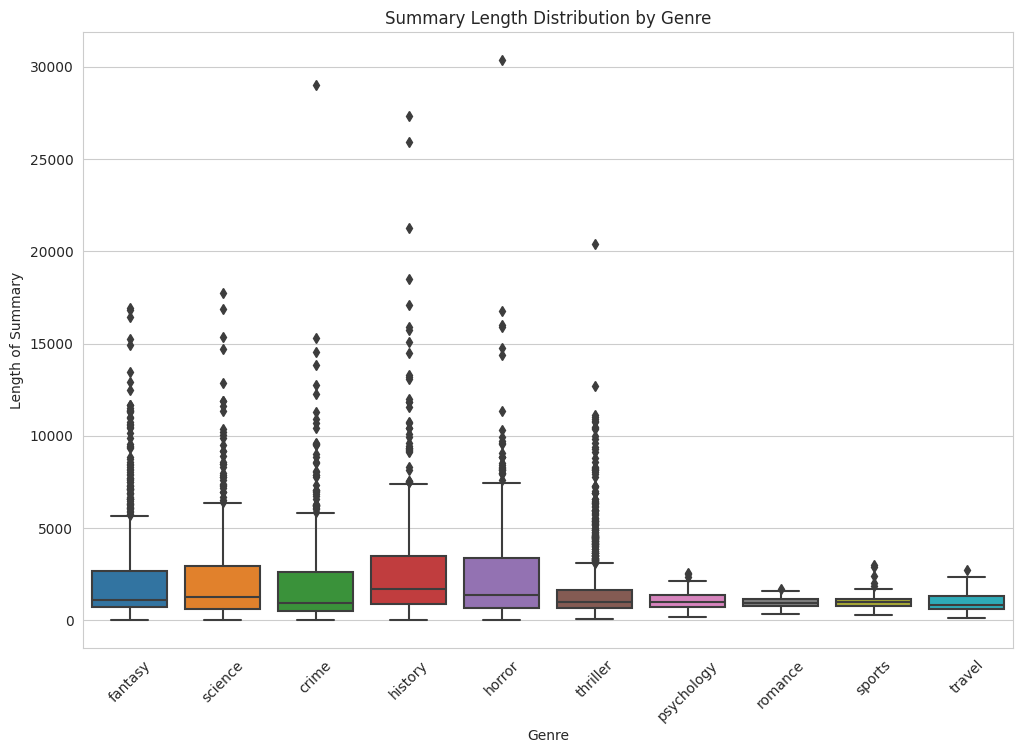

In [ ]:
# Box plot for summary length by genre
plt.figure(figsize=(12, 8))
sns.boxplot(x="genre", y=summary_lengths, data=df)
plt.xticks(rotation=45)
plt.title("Summary Length Distribution by Genre")
plt.xlabel("Genre")
plt.ylabel("Length of Summary")
plt.show()

<div dir='rtl'>
<p>
حال در این مرحله، به پیش‌پردازش متن می‌پردازیم. این پیش‌پردازش باید روی هر دو ستون title و summary اعمال شود.
برای پیش‌پردازش نیازی نیست که هرکدام از اعمال پیش‌پردازش را خودتان مانند تمارین قبل پیاده کنید. برای پیاده‌سازی تابع زیر می‌توانید از کتابخانه‌های معمول برای این کار بهره ببرید.
</p>
</div>

In [11]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def preprocess_text(text, minimum_length=1, stopword_removal=True, stopwords_domain=[], lower_case=True,
                    punctuation_removal=True):
    """
    Preprocess text by removing stopwords, punctuations, and converting to lowercase, and also filter based on a minimum length.
    For stopwords, use nltk.corpus.stopwords.words('english') and any domain-specific stopwords.
    For punctuations, use string.punctuation.

    Parameters
    ----------
    text: str
        Text to be preprocessed.
    minimum_length: int
        Minimum length of the token.
    stopword_removal: bool
        Whether to remove stopwords.
    stopwords_domain: list
        List of stopwords to be removed based on domain.
    lower_case: bool
        Whether to convert to lowercase.
    punctuation_removal: bool
        Whether to remove punctuations.
    """

    # Convert to lowercase if enabled
    if lower_case:
        text = text.lower()

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove punctuations if enabled
    if punctuation_removal:
        tokens = [token for token in tokens if token not in string.punctuation]

    # Remove stopwords if enabled
    if stopword_removal:
        all_stopwords = set(stopwords.words('english')) | set(stopwords_domain)
        tokens = [token for token in tokens if token not in all_stopwords]

    # Filter tokens based on minimum length
    tokens = [token for token in tokens if len(token) >= minimum_length]

    return tokens


In [13]:
# Apply preprocess text on both title and summary columns
df['title'] = df['title'].apply(lambda x: ' '.join(preprocess_text(x, minimum_length=1, stopword_removal=True, stopwords_domain=[], lower_case=True, punctuation_removal=True)))
df['summary'] = df['summary'].apply(lambda x: ' '.join(preprocess_text(x, minimum_length=1, stopword_removal=True, stopwords_domain=[], lower_case=True, punctuation_removal=True)))
df.head()

title    genre  \
0  drowned wednesday  fantasy   
1          lost hero  fantasy   
2     eyes overworld  fantasy   
3   magic 's promise  fantasy   
4     taran wanderer  fantasy   

                                             summary  
0  drowned wednesday first trustee among morrow d...  
1  book opens jason awakens school bus unable rem...  
2  cugel easily persuaded merchant fianosther att...  
3  book opens heraldmage vanyel returning country...  
4  taran gurgi returned caer dallben following ev...

<div dir="rtl">
در نهایت بعد از اپلای کردن پیش‌پردازش روی هر دو ستون، دو ستون پیش‌پردازش شده را با هم ادغام کنید و آن را در یک آرایه به نام X قرار دهید.
</div>

In [14]:
# Merge preprocessed columns
df["tokens"] = df["title"].str.cat(df["summary"], " ").apply(lambda x: x.split(" "))
df.head()

title    genre  \
0  drowned wednesday  fantasy   
1          lost hero  fantasy   
2     eyes overworld  fantasy   
3   magic 's promise  fantasy   
4     taran wanderer  fantasy   

                                             summary  \
0  drowned wednesday first trustee among morrow d...   
1  book opens jason awakens school bus unable rem...   
2  cugel easily persuaded merchant fianosther att...   
3  book opens heraldmage vanyel returning country...   
4  taran gurgi returned caer dallben following ev...   

                                              tokens  
0  [drowned, wednesday, drowned, wednesday, first...  
1  [lost, hero, book, opens, jason, awakens, scho...  
2  [eyes, overworld, cugel, easily, persuaded, me...  
3  [magic, 's, promise, book, opens, heraldmage, ...  
4  [taran, wanderer, taran, gurgi, returned, caer...

<div dir="rtl">
<h2>1-1.
Embedding
</h2>

در این قسمت از fasttext کمک می‌گیریم تا به یک embedding اولیه برای هر کتاب برسیم.
    با استفاده از داده‌هایی که داریم یک مدل fasttext آموزش دهید که برای هر توکن یک امبدینگ ۱۰۰تایی بدهد.
    در مرحله‌ی بعد میانگین وزن دار امبدینگ های fasttext
        توکن‌های ورودی (چکیده + عنوان)
    را بر اساس tfidif آن‌ها محاسبه کنید و به امبدینگ نهایی متن برسید.
    <br>
    در واقع به عبارت ساده‌تر بر اساس میانگین وزن‌دار که وزن‌های ما tfidf توکن‌ها می‌باشد به امبدینگ نهایی متن بر اساس fasttext می‌رسیم.
</div>

In [15]:
import tempfile


class FastText:

    def __init__(self, preprocessor=None, method='skipgram'):
        self.method = method
        self.model = None
        self.preprocessor = preprocessor

    def train(self, texts):
        """
        train the fasttext model and save it into self.model
        Parameters
        ----------
        texts: list of list of str
        """
        with tempfile.NamedTemporaryFile("w") as f:
            print('\n'.join([' '.join(text) for text in texts]), file=f)
            f.seek(0)
            self.model = fasttext.train_unsupervised(input=f.name, model=self.method, dim=100)

    def get_query_embedding(self, query, tf_idf_vectorizer):
        """
        get the embedding of the query. You can use the tf_idf_vectorizer to get the weights of the words in the query. preprocess the query using self.preprocessor if it is not None
        Parameters
        ----------
        query: str
        tf_idf_vectorizer: TfidfVectorizer
        Returns embedding of the query
        """
        if self.preprocessor:
            query = self.preprocessor(query)
        else:
            query= query.split()
        w = tf_idf_vectorizer.transform([' '.join(query)])
        embedding = np.zeros(100)
        for word in query:
            try:
                embedding += self.model.get_word_vector(word) * w[0, tf_idf_vectorizer.vocabulary_[word]]
            except:
                pass
        return embedding

    def save_FastText_model(self, path='FastText_model.bin'):
        self.model.save_model(path)

    def load_FastText_model(self, path="FastText_model.bin"):
        self.model = fasttext.load_model(path)

    def prepare(self, dataset, mode, save=False):
        if mode == 'train':
            self.train(dataset)
        if mode == 'load':
            self.load_FastText_model()
        if save:
            self.save_FastText_model()

In [16]:
# Train fasttext on X
fasttext_model = FastText(preprocessor=preprocess_text)
fasttext_model.prepare(dataset=df["tokens"], mode='train', save=True)

In [ ]:
# Get nearest neighbors of an arbitrary word using fasttext
query = "dragon"
fasttext_model.model.get_nearest_neighbors(query)

[(0.9314266443252563, 'dragonstone'),
 (0.9299668073654175, 'dragonlord'),
 (0.9050078392028809, 'dragons'),
 (0.9023850560188293, 'eragon'),
 (0.9006133079528809, 'drago'),
 (0.8767384886741638, 'dragonsnakes'),
 (0.8684518933296204, 'dragonfly'),
 (0.8561584949493408, 'pendragon'),
 (0.8422704935073853, 'wagon'),
 (0.8269807696342468, 'aemon')]

In [ ]:
query = "family"
fasttext_model.model.get_nearest_neighbors(query)

[(0.8788933753967285, 'familys'),
 (0.8260005712509155, 'familiar'),
 (0.8062565326690674, 'familiarity'),
 (0.793729841709137, 'cecily'),
 (0.7908364534378052, 'families'),
 (0.7854577302932739, 'parenthood'),
 (0.7820121049880981, 'familiars'),
 (0.7637947201728821, 'emily'),
 (0.7541442513465881, 'homestead'),
 (0.7534143924713135, 'housewife')]

<div dir="rtl">
در این مرحله آرایه X را روی TFIDF فیت می‌کنیم.
</div>

In [17]:
class TF_IDF:

    def __init__(self):
        self.vectorizer = TfidfVectorizer()

    def fit_vectorizer(self, data):
        """
        fit the vectorizer on the data
        Parameters
        ----------
        data: list of list of str
        """
        self.vectorizer.fit([' '.join(tokens) for tokens in data])

In [18]:
# Fit TFIDF Vectorizer on X
tf_idf_model = TF_IDF()
tf_idf_model.fit_vectorizer(df["tokens"])

In [ ]:
# Get Embedding of an arbitrary query using your prior implemention
query = "Embedding of an arbitrary query"
fasttext_model.get_query_embedding(query, tf_idf_model.vectorizer)

array([-0.16974312, -0.00898183,  0.19314378, -0.03710254,  0.11685234,
        0.16674144, -0.07854325, -0.36640134,  0.00484306,  0.05181362,
        0.02099157,  0.1519271 ,  0.01920428, -0.04706734,  0.12408211,
        0.14051421, -0.05667646, -0.03813016, -0.01781016,  0.00942239,
       -0.35141306,  0.23560159, -0.32993883, -0.22548702,  0.24763998,
       -0.06152268,  0.07982197,  0.41284382,  0.01707657, -0.0887646 ,
        0.44440117, -0.07751812, -0.05465605, -0.53772017, -0.07439488,
        0.07396139,  0.16222035,  0.30619784, -0.00808528,  0.20558105,
        0.03313128,  0.13460333,  0.30948194,  0.3500205 ,  0.43147275,
       -0.41291922,  0.13580796,  0.25367074,  0.2154571 ,  0.01675769,
        0.16819072, -0.57442671, -0.29379957,  0.49398762, -0.08464877,
       -0.35037421,  0.26772109, -0.20040786, -0.19819767, -0.201612  ,
        0.28050145, -0.0219406 ,  0.38971934,  0.14557372,  0.19954844,
        0.31007855, -0.1992689 ,  0.25527684, -0.23296977,  0.03

<div dir="rtl">
در نهایت، تمامی entry های درون X را به صورت امبدینگ دربیاورید و آن را در X ذخیره کنید.
</div>

In [19]:
# Get embedding on each document in X

df.head()

title    genre  \
0  drowned wednesday  fantasy   
1          lost hero  fantasy   
2     eyes overworld  fantasy   
3   magic 's promise  fantasy   
4     taran wanderer  fantasy   

                                             summary  \
0  drowned wednesday first trustee among morrow d...   
1  book opens jason awakens school bus unable rem...   
2  cugel easily persuaded merchant fianosther att...   
3  book opens heraldmage vanyel returning country...   
4  taran gurgi returned caer dallben following ev...   

                                              tokens  \
0  [drowned, wednesday, drowned, wednesday, first...   
1  [lost, hero, book, opens, jason, awakens, scho...   
2  [eyes, overworld, cugel, easily, persuaded, me...   
3  [magic, 's, promise, book, opens, heraldmage, ...   
4  [taran, wanderer, taran, gurgi, returned, caer...   

                                                   X  
0  [0.6664675369083852, 2.4523357148395917, 4.019...  
1  [-3.128966666510678, 0.2822877715661889, 1.589...  
2  [-2.3044777151626477, -1.5465830031498626, 1.9...  
3  [-4.14779013754378, 0.5390121687578358, 7.8568...  
4  [-5.020311120133556, 9.954995413472716, 12.251...

<div dir='rtl'>
<h2>1-2.
آماده‌سازی داده تمرین و تست
</h2>
<p>
در این بخش ابتدا می‌خواهیم تا داده‌ای که می‌خواهیم بر اساس آن کلاسه‌بندی کتاب‌ها را انجام دهیم، که همان ژانر کتاب‌ها است را انکود کنیم.
<br>
سپس با جداسازی داده آموزش و تست، به آموزش مدل‌های کلاسه‌بند می‌پردازیم.
</p>
</div>

In [20]:
# Encode genres with values between 0 and n_classes-1 and save it in array Y
categories = sorted(df['genre'].unique())
df['Y'] = df['genre'].apply(lambda c: categories.index(c))
df

title    genre  \
0             drowned wednesday  fantasy   
1                     lost hero  fantasy   
2                eyes overworld  fantasy   
3              magic 's promise  fantasy   
4                taran wanderer  fantasy   
...                         ...      ...   
4652                    hounded  fantasy   
4653  charlie chocolate factory  fantasy   
4654                 red rising  fantasy   
4655                  frostbite  fantasy   
4656                   radiance  fantasy   

                                                summary  \
0     drowned wednesday first trustee among morrow d...   
1     book opens jason awakens school bus unable rem...   
2     cugel easily persuaded merchant fianosther att...   
3     book opens heraldmage vanyel returning country...   
4     taran gurgi returned caer dallben following ev...   
...                                                 ...   
4652  atticus osullivan last druids lives peacefully...   
4653  charlie buckets wonderful adventure begins fin...   
4654  live dream children born free says like land f...   
4655  rose loves dimitri dimitri might love tasha ma...   
4656  prince value brishen khaskem prince kai lived ...   

                                                 tokens  \
0     [drowned, wednesday, drowned, wednesday, first...   
1     [lost, hero, book, opens, jason, awakens, scho...   
2     [eyes, overworld, cugel, easily, persuaded, me...   
3     [magic, 's, promise, book, opens, heraldmage, ...   
4     [taran, wanderer, taran, gurgi, returned, caer...   
...                                                 ...   
4652  [hounded, atticus, osullivan, last, druids, li...   
4653  [charlie, chocolate, factory, charlie, buckets...   
4654  [red, rising, live, dream, children, born, fre...   
4655  [frostbite, rose, loves, dimitri, dimitri, mig...   
4656  [radiance, prince, value, brishen, khaskem, pr...   

                                                      X  Y  
0     [0.6664675369083852, 2.4523357148395917, 4.019...  1  
1     [-3.128966666510678, 0.2822877715661889, 1.589...  1  
2     [-2.3044777151626477, -1.5465830031498626, 1.9...  1  
3     [-4.14779013754378, 0.5390121687578358, 7.8568...  1  
4     [-5.020311120133556, 9.954995413472716, 12.251...  1  
...                                                 ... ..  
4652  [-1.6276306924119126, -1.2154894401319325, 1.1...  1  
4653  [-1.3772249893518165, -0.8617406516859774, 0.4...  1  
4654  [-2.7052708876581164, -1.0744905073588598, 2.5...  1  
4655  [-2.022737590421457, -0.4078746471532213, 1.94...  1  
4656  [-1.2008949657902122, -0.0483098006916407, 2.0...  1  

[4657 rows x 6 columns]

In [21]:
vectorizer = CountVectorizer()
doc_word = vectorizer.fit_transform(df["tokens"].apply(lambda x: " ".join(x)).tolist())

X_train, X_test, y_train, y_test = train_test_split(doc_word.toarray(), df['genre'], test_size=0.2, random_state=13)

In [22]:
X = np.array(df["X"].tolist())
Y = np.array(df["Y"].tolist())

<div dir="rtl">
<h1>2.
کلاسه‌بندی متن
</h1>
در این بخش می‌خواهیم تا با استفاده از داده‌هایی که داریم، سه مدل کلاسه‌بندی متن را آموزش دهیم و عملکرد آن‌ها را با هم مقایسه کنیم.
</div>

<div dir="rtl">
<h2>2-1.
SVM و Naive Bayes
</h2>
با استفاده از توابع آماده در sklearn، کلاسه‌بند SVM و Naive Bayes را روی داده آموزش تمرین دهید. سپس، ژانر داده تست را با استفاده از مدل آموزش داده شده پیش‌بینی کنید و آن را در آرایه‌های NB_prediction و SVM_prediction ذخیره کنید.</div>

### Performing classification on `word` and `doc` co occurrence matrix.

In [24]:
# Train Sklearn's SVM and Naive Bayes implementation on X_train and Y_train
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC

#### Naive Bayes

In [ ]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
NB_prediction = nb_model.predict(X_test)

# Evaluate Naive Bayes model
nb_accuracy = accuracy_score(y_test, NB_prediction)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes Classification Report:")
print(classification_report(y_test, NB_prediction, zero_division=0))

Naive Bayes Accuracy: 0.6523605150214592
Naive Bayes Classification Report:
              precision    recall  f1-score   support

       crime       0.89      0.56      0.69       111
     fantasy       0.70      0.76      0.73       164
     history       0.74      0.70      0.72       117
      horror       0.62      0.55      0.58       128
  psychology       0.00      0.00      0.00        20
     romance       0.00      0.00      0.00        19
     science       0.70      0.71      0.70       138
      sports       1.00      0.06      0.11        18
    thriller       0.53      0.84      0.65       202
      travel       0.00      0.00      0.00        15

    accuracy                           0.65       932
   macro avg       0.52      0.42      0.42       932
weighted avg       0.65      0.65      0.63       932



#### Support Vector Machine

In [ ]:
svm_model = SVC(probability=False)
svm_model.fit(X_train[:1000, :], y_train[:1000])

SVC()

In [ ]:
SVM_prediction = svm_model.predict(X_test)

# Evaluate SVM model
svm_accuracy = accuracy_score(y_test, SVM_prediction)
print("SVM Accuracy:", svm_accuracy)
print("SVM Classification Report:")
print(classification_report(y_test, SVM_prediction, zero_division=0))

SVM Accuracy: 0.2821888412017167
SVM Classification Report:
              precision    recall  f1-score   support

       crime       1.00      0.01      0.02       111
     fantasy       0.28      0.40      0.33       164
     history       1.00      0.07      0.13       117
      horror       0.00      0.00      0.00       128
  psychology       0.00      0.00      0.00        20
     romance       0.00      0.00      0.00        19
     science       0.83      0.07      0.13       138
      sports       0.00      0.00      0.00        18
    thriller       0.27      0.88      0.41       202
      travel       0.00      0.00      0.00        15

    accuracy                           0.28       932
   macro avg       0.34      0.14      0.10       932
weighted avg       0.47      0.28      0.18       932



<div dir="rtl">
<h2>2-2.  
Rocchio
</h2>
می‌خواهیم روش Rocchio را از
پایه پیاده‌سازی کنیم.
با توجه به شواهد نوشته شده هر تابع را کامل کنید و با آموزش مدل روی داده‌های train
لیبل‌های داده‌های test
را پیش بینی کنید و آن را در rocchio_prediction ذخیره کنید.
</div>

In [33]:
class RocchioTextClassifier:
    def __init__(self, preprocessor=None):
        self.preprocessor = preprocessor
        self.centroids = None

    def calculate_centroids(self, X, y):
        """
        Calculates the centroids of each class in the dataset. A centroid is defined as the mean vector of all the feature vectors in a class.

        Parameters
        ----------
        X : np.ndarray
            An array contaning the feature vectors of each sentence.

        y : np.ndarray
            An array containing the class labels for each feature vector in X.

        Sets self.centeroids as a dictionary where keys are unique class labels from 'y', and values are the calculated centroids (mean vectors) for each class.
        """
        self.centroids = {}
        unique_classes = np.unique(y)

        for class_label in unique_classes:
            class_indices = np.where(y == class_label)[0]
            class_vectors = X[class_indices]
            class_centroid = np.mean(class_vectors, axis=0)
            self.centroids[class_label] = class_centroid


    def predict_label(self, x):
        """
        Classifies a new instance by finding the class whose centroid is closest to the new instance's vector.

        Parameters
        ----------
        X : np.ndarray
            An array of a new instance to be classified.

        Returns
        -------
        object
            The predicted label for the input.
        """
        min_distance = float('inf')
        label = None
        for class_label, centroid in self.centroids.items():
            distance = np.linalg.norm(x - centroid)
            if distance < min_distance:
                min_distance = distance
                label = class_label
        return label

    def predict(self, X):
        """
        Classifies the array X

        Parameters
        ----------
        X : np.ndarray
            An array of new instances to be classified.

        Returns
        -------
        object
            The predicted label for each input.
        """
        return np.array([self.predict_label(x) for x in X])


In [ ]:
# Train your Rocchio implementation on X_train and Y_train
rocchio_classifier = RocchioTextClassifier()
rocchio_classifier.calculate_centroids(X_train, y_train)

In [ ]:
# Predict on X_test using the trained model
rocchio_prediction = rocchio_classifier.predict(X_test)

<div dir="rtl">
<h2>2-3.
ارزیابی
</h2>
برای هر سه روش پیاده‌سازی شده، معیار‌های ارزیابی زیر را بررسی کنید.
<br>
f1 score, accuracy, precision, recall
<br>
سپس، نتایج به دست آمده را با هم در چهار نمودار مقایسه کنید.
</div>

In [ ]:
# Run evaluation metrics on the predictions

def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"{model_name} Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}\n")

    return accuracy, precision, recall, f1

# Evaluate Naive Bayes
accuracy_nb, precision_nb, recall_nb, f1_nb = evaluate_model(y_test, NB_prediction, "Naive Bayes")
print("=======================================")

# Evaluate SVM
accuracy_svm, precision_svm, recall_svm, f1_svm = evaluate_model(y_test, SVM_prediction, "SVM")
print("=======================================")

# Evaluate Rocchio
accuracy_rocchio, precision_rocchio, recall_rocchio, f1_rocchio = evaluate_model(y_test, rocchio_prediction, "Rocchio")
print("=======================================")

Naive Bayes Evaluation Metrics:
Accuracy: 0.6524
Precision: 0.6457
Recall: 0.6524
F1 Score: 0.6284

SVM Evaluation Metrics:
Accuracy: 0.2822
Precision: 0.4739
Recall: 0.2822
F1 Score: 0.1838

Rocchio Evaluation Metrics:
Accuracy: 0.3691
Precision: 0.5934
Recall: 0.3691
F1 Score: 0.4211



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


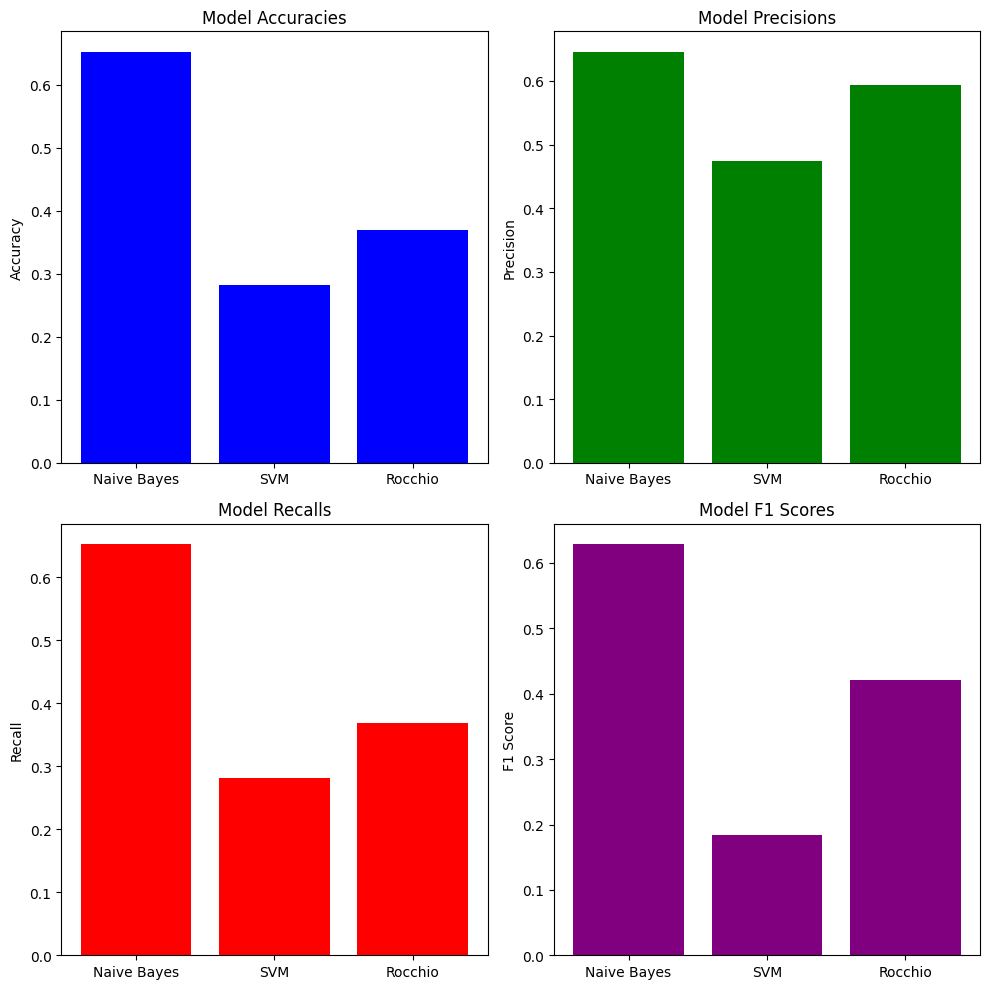

In [ ]:
# TODO: Plot evaulations
import matplotlib.pyplot as plt

models = ['Naive Bayes', 'SVM', 'Rocchio']
accuracies = [accuracy_nb, accuracy_svm, accuracy_rocchio]
precisions = [precision_nb, precision_svm, precision_rocchio]
recalls = [recall_nb, recall_svm, recall_rocchio]
f1_scores = [f1_nb, f1_svm, f1_rocchio]

# Creating subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Accuracy Plot
axs[0, 0].bar(models, accuracies, color='blue')
axs[0, 0].set_title('Model Accuracies')
axs[0, 0].set_ylabel('Accuracy')

# Precision Plot
axs[0, 1].bar(models, precisions, color='green')
axs[0, 1].set_title('Model Precisions')
axs[0, 1].set_ylabel('Precision')

# Recall Plot
axs[1, 0].bar(models, recalls, color='red')
axs[1, 0].set_title('Model Recalls')
axs[1, 0].set_ylabel('Recall')

# F1 Score Plot
axs[1, 1].bar(models, f1_scores, color='purple')
axs[1, 1].set_title('Model F1 Scores')
axs[1, 1].set_ylabel('F1 Score')

# Adjusting layout
plt.tight_layout()

# Show the plot
plt.show()

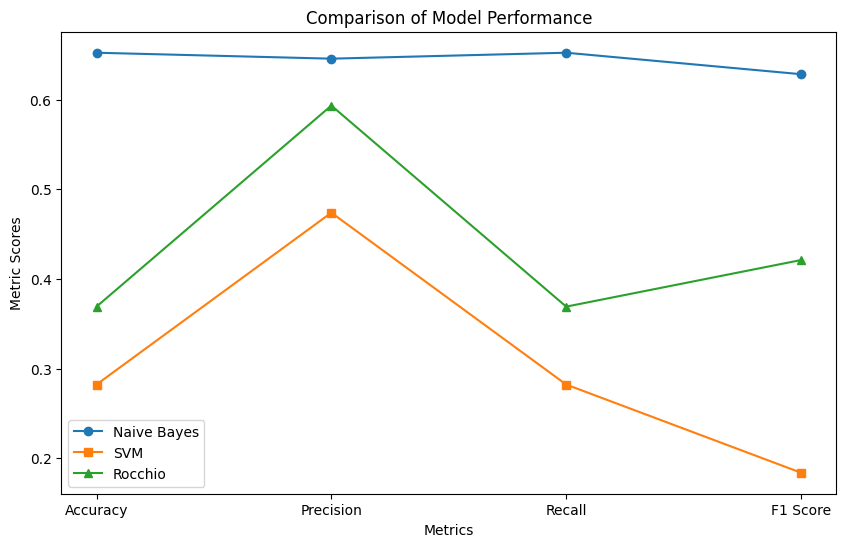

In [ ]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
naive_bayes = [accuracy_nb, precision_nb, recall_nb, f1_nb]
svm = [accuracy_svm, precision_svm, recall_svm, f1_svm]
rocchio = [accuracy_rocchio, precision_rocchio, recall_rocchio, f1_rocchio]

# Creating the line plot
plt.figure(figsize=(10, 6))
plt.plot(metrics, naive_bayes, label='Naive Bayes', marker='o')
plt.plot(metrics, svm, label='SVM', marker='s')
plt.plot(metrics, rocchio, label='Rocchio', marker='^')

# Adding titles and labels
plt.title('Comparison of Model Performance')
plt.ylabel('Metric Scores')
plt.xlabel('Metrics')
plt.legend()

# Show the plot
plt.show()

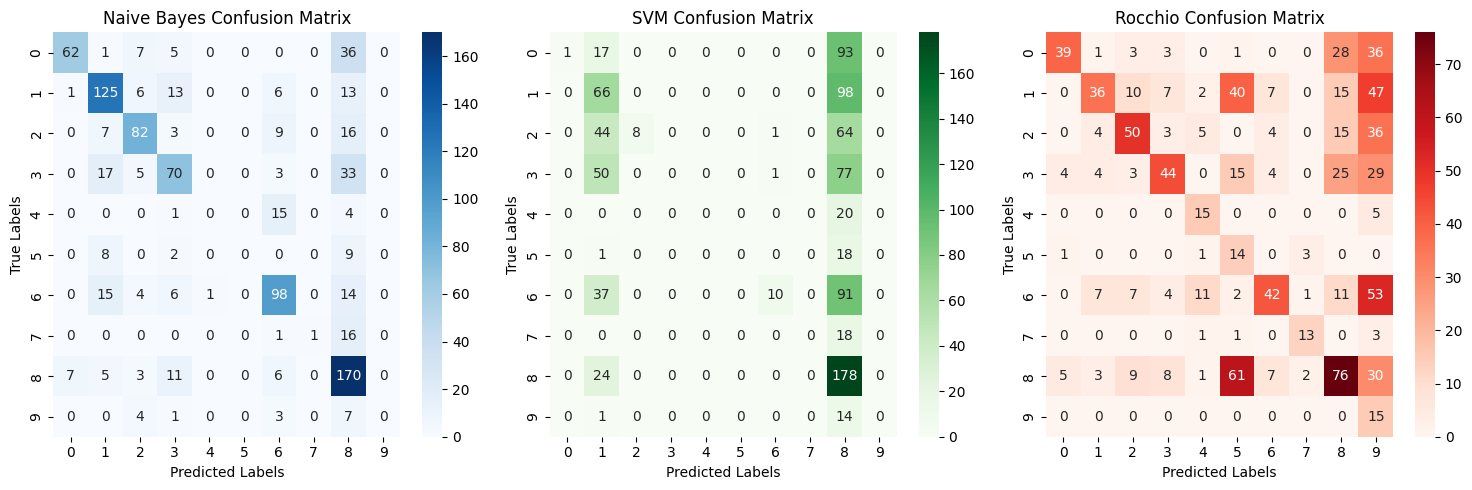

In [ ]:
# TODO: Draw confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrices for each model
conf_matrix_nb = confusion_matrix(y_test, NB_prediction)
conf_matrix_svm = confusion_matrix(y_test, SVM_prediction)
conf_matrix_rocchio = confusion_matrix(y_test, rocchio_prediction)

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.heatmap(conf_matrix_nb, annot=True, ax=axs[0], cmap='Blues', fmt='g')
axs[0].set_title('Naive Bayes Confusion Matrix')
axs[0].set_xlabel('Predicted Labels')
axs[0].set_ylabel('True Labels')

sns.heatmap(conf_matrix_svm, annot=True, ax=axs[1], cmap='Greens', fmt='g')
axs[1].set_title('SVM Confusion Matrix')
axs[1].set_xlabel('Predicted Labels')
axs[1].set_ylabel('True Labels')

sns.heatmap(conf_matrix_rocchio, annot=True, ax=axs[2], cmap='Reds', fmt='g')
axs[2].set_title('Rocchio Confusion Matrix')
axs[2].set_xlabel('Predicted Labels')
axs[2].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

### Performing classification on the embedding.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=13)

#### Naive Bayes

In [27]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [28]:
NB_prediction = nb_model.predict(X_test)

# Evaluate Naive Bayes model
nb_accuracy = accuracy_score(y_test, NB_prediction)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes Classification Report:")
print(classification_report(y_test, NB_prediction, zero_division=0))

Naive Bayes Accuracy: 0.18025751072961374
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.09      0.16       111
           1       0.71      0.12      0.21       164
           2       0.46      0.19      0.27       117
           3       0.42      0.19      0.26       128
           4       0.11      0.50      0.18        20
           5       0.07      0.68      0.12        19
           6       0.48      0.23      0.31       138
           7       0.15      0.50      0.23        18
           8       0.17      0.08      0.11       202
           9       0.04      0.80      0.08        15

    accuracy                           0.18       932
   macro avg       0.32      0.34      0.19       932
weighted avg       0.43      0.18      0.21       932



#### Support Vector Machine

In [29]:
svm_model = SVC(probability=False)
svm_model.fit(X_train, y_train)

SVC()

In [30]:
SVM_prediction = svm_model.predict(X_test)

# Evaluate SVM model
svm_accuracy = accuracy_score(y_test, SVM_prediction)
print("SVM Accuracy:", svm_accuracy)
print("SVM Classification Report:")
print(classification_report(y_test, SVM_prediction, zero_division=0))

SVM Accuracy: 0.5214592274678111
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.19      0.29       111
           1       0.61      0.75      0.67       164
           2       0.63      0.49      0.55       117
           3       0.69      0.32      0.44       128
           4       0.00      0.00      0.00        20
           5       0.00      0.00      0.00        19
           6       0.65      0.54      0.59       138
           7       0.00      0.00      0.00        18
           8       0.39      0.84      0.53       202
           9       0.00      0.00      0.00        15

    accuracy                           0.52       932
   macro avg       0.36      0.31      0.31       932
weighted avg       0.54      0.52      0.49       932



#### Rocchio

In [34]:
# Train your Rocchio implementation on X_train and Y_train
rocchio_classifier = RocchioTextClassifier()
rocchio_classifier.calculate_centroids(X_train, y_train)

In [35]:
# Predict on X_test using the trained model
rocchio_prediction = rocchio_classifier.predict(X_test)

In [36]:
# Evaluate Naive Bayes
accuracy_nb, precision_nb, recall_nb, f1_nb = evaluate_model(y_test, NB_prediction, "Naive Bayes")
print("=======================================")

# Evaluate SVM
accuracy_svm, precision_svm, recall_svm, f1_svm = evaluate_model(y_test, SVM_prediction, "SVM")
print("=======================================")

# Evaluate Rocchio
accuracy_rocchio, precision_rocchio, recall_rocchio, f1_rocchio = evaluate_model(y_test, rocchio_prediction, "Rocchio")
print("=======================================")

Naive Bayes Evaluation Metrics:
Accuracy: 0.1803
Precision: 0.4257
Recall: 0.1803
F1 Score: 0.2062

SVM Evaluation Metrics:
Accuracy: 0.5215
Precision: 0.5381
Recall: 0.5215
F1 Score: 0.4854

Rocchio Evaluation Metrics:
Accuracy: 0.2446
Precision: 0.4826
Recall: 0.2446
F1 Score: 0.2822



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


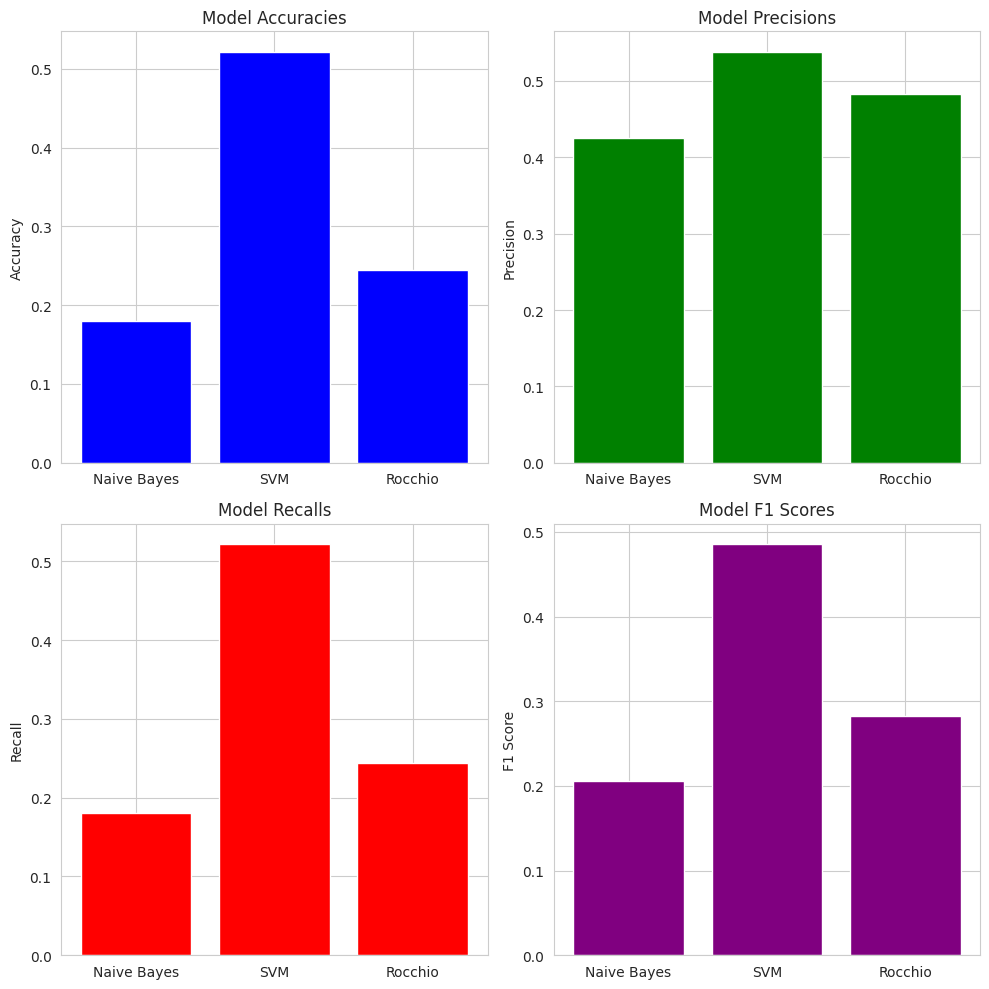

In [37]:
models = ['Naive Bayes', 'SVM', 'Rocchio']
accuracies = [accuracy_nb, accuracy_svm, accuracy_rocchio]
precisions = [precision_nb, precision_svm, precision_rocchio]
recalls = [recall_nb, recall_svm, recall_rocchio]
f1_scores = [f1_nb, f1_svm, f1_rocchio]

# Creating subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Accuracy Plot
axs[0, 0].bar(models, accuracies, color='blue')
axs[0, 0].set_title('Model Accuracies')
axs[0, 0].set_ylabel('Accuracy')

# Precision Plot
axs[0, 1].bar(models, precisions, color='green')
axs[0, 1].set_title('Model Precisions')
axs[0, 1].set_ylabel('Precision')

# Recall Plot
axs[1, 0].bar(models, recalls, color='red')
axs[1, 0].set_title('Model Recalls')
axs[1, 0].set_ylabel('Recall')

# F1 Score Plot
axs[1, 1].bar(models, f1_scores, color='purple')
axs[1, 1].set_title('Model F1 Scores')
axs[1, 1].set_ylabel('F1 Score')

# Adjusting layout
plt.tight_layout()

# Show the plot
plt.show()

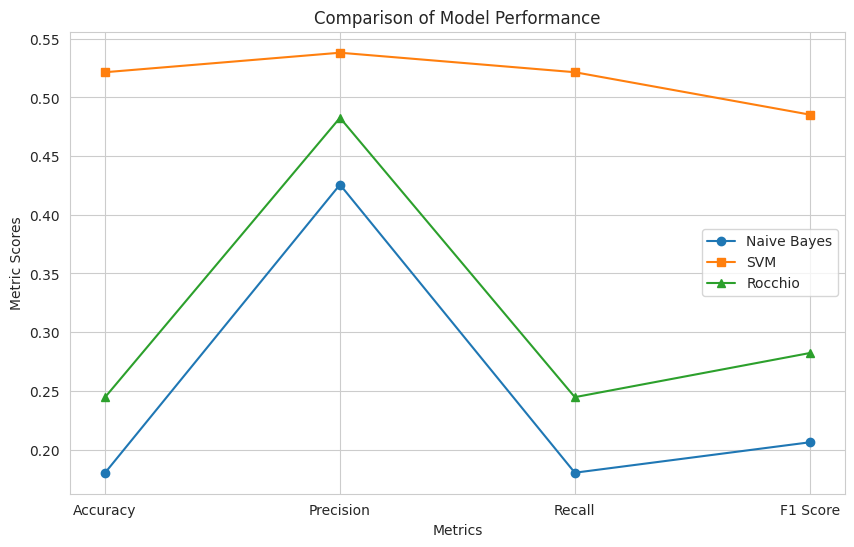

In [38]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
naive_bayes = [accuracy_nb, precision_nb, recall_nb, f1_nb]
svm = [accuracy_svm, precision_svm, recall_svm, f1_svm]
rocchio = [accuracy_rocchio, precision_rocchio, recall_rocchio, f1_rocchio]

# Creating the line plot
plt.figure(figsize=(10, 6))
plt.plot(metrics, naive_bayes, label='Naive Bayes', marker='o')
plt.plot(metrics, svm, label='SVM', marker='s')
plt.plot(metrics, rocchio, label='Rocchio', marker='^')

# Adding titles and labels
plt.title('Comparison of Model Performance')
plt.ylabel('Metric Scores')
plt.xlabel('Metrics')
plt.legend()

# Show the plot
plt.show()

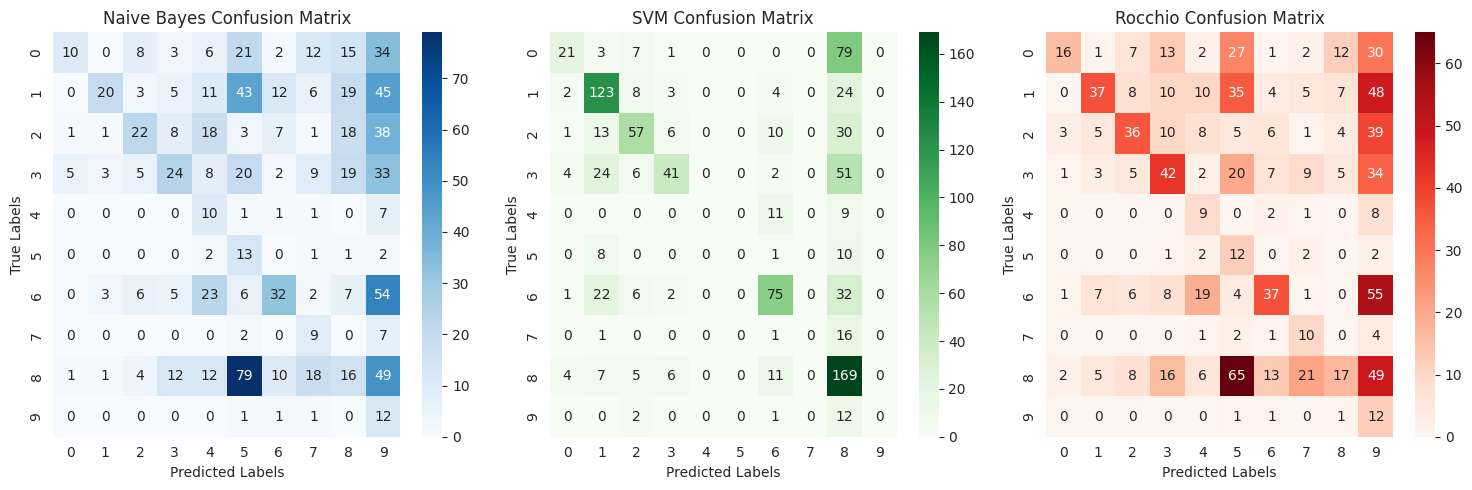

In [39]:
# Confusion matrices for each model
conf_matrix_nb = confusion_matrix(y_test, NB_prediction)
conf_matrix_svm = confusion_matrix(y_test, SVM_prediction)
conf_matrix_rocchio = confusion_matrix(y_test, rocchio_prediction)

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.heatmap(conf_matrix_nb, annot=True, ax=axs[0], cmap='Blues', fmt='g')
axs[0].set_title('Naive Bayes Confusion Matrix')
axs[0].set_xlabel('Predicted Labels')
axs[0].set_ylabel('True Labels')

sns.heatmap(conf_matrix_svm, annot=True, ax=axs[1], cmap='Greens', fmt='g')
axs[1].set_title('SVM Confusion Matrix')
axs[1].set_xlabel('Predicted Labels')
axs[1].set_ylabel('True Labels')

sns.heatmap(conf_matrix_rocchio, annot=True, ax=axs[2], cmap='Reds', fmt='g')
axs[2].set_title('Rocchio Confusion Matrix')
axs[2].set_xlabel('Predicted Labels')
axs[2].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

<div dir="rtl">
کدام مدل از همه دقیق‌تر عمل کرد؟ نتیجه‌گیری و تحلیل خود از نتایج ارزیابی را گزارش دهید.
</div>

<span style="color: red;">For the `Docs` and `Words` data, Based on the provided metrics, `Naive Bayes` is the most accurate method with an accuracy of $65.24%$ and the highest F1 score of $62.84%$. This suggests it not only correctly classifies a higher proportion of instances overall but also maintains a better balance between precision and recall. `SVM` and `Rocchio` show significantly lower accuracy and F1 scores, indicating less reliable performance for this particular dataset and task. While Naive Bayes proves to be the best choice in this scenario, the choice of model can vary with different datasets and requirements.

But based on the result for the embbeding as the dataset, the `SVM` model is the best, then `Rocchio` classifier and finally `Naive Bayes`.
</span>


<div dir="rtl">
<h1>3.
کاهش ابعاد و خوشه‌بندی متن
</h1>
</div>

<div dir="rtl">
<h2>3-1.
کاهش ابعاد
</h2>
</div>

<div dir="rtl">
<h3>3-1-1.
PCA
</h3>
یکی از روش‌های کاهش ابعاد، PCA است. با استفاده از پیاده‌سازی آن در کتابخانه sklearn، ابعاد ویژگی‌های X را کاهش دهید.
<br>
سپس با استفاده از explained_variance_ratio_ در الگوریتم PCA  نشان دهید که با وجود یک ترشولد 90 درصد تا چه میزان میتوان ابعاد ویژگی ها را کم تر کرد.
</div>

In [ ]:
from sklearn.decomposition import PCA

def reduce_dimension(embedding, n_components):
    """
    Performs dimensional reduction using PCA with n components left behind

    Parameters
    ----------
    embeddings : List
        A list of embeddings of documents

    n_components: int
        Number of components to keep

    Returns a list of reduced embeddings
    """
    pca = PCA(n_components=n_components)
    reduced_embeddings = pca.fit_transform(embedding)
    return reduced_embeddings

<div dir="rtl">
در این قسمت می‌توانید برای شهود بهتر، نمودار رسم کنید و همچنین برای ساده‌تر شدن کار، از pipeline‌های sklearn بهره ببرید.
<br>
<i> انجام این کار‌ها صرفا توصیه است و اجباری نیست. </i>
</div>

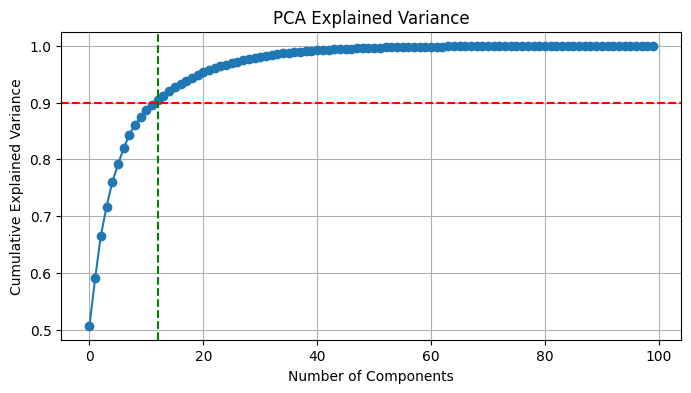

Optimal number of components: 13


In [ ]:
# Findout the most reduced dimension which has 90% cutoff explained variance.
from sklearn.pipeline import Pipeline

def find_optimal_components(embeddings, explained_variance_cutoff=0.90):
    # Create a PCA pipeline
    pca = PCA()
    pipeline = Pipeline([('pca', pca)])

    # Fit the model to the data
    pipeline.fit(embeddings)

    # Calculate the cumulative explained variance
    cumulative_variance = pca.explained_variance_ratio_.cumsum()

    # Determine the number of components that satisfy the explained variance cutoff
    n_components = sum(cumulative_variance < explained_variance_cutoff) + 1

    # Plotting the process
    plt.figure(figsize=(8, 4))
    plt.plot(cumulative_variance, marker='o')
    plt.axhline(y=explained_variance_cutoff, color='r', linestyle='--')
    plt.axvline(x=n_components - 1, color='g', linestyle='--')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('PCA Explained Variance')
    plt.grid(True)
    plt.show()

    return n_components


optimal_components = find_optimal_components(np.array(df["X"].tolist()))
print("Optimal number of components:", optimal_components)

<div dir="rtl">
<h3>3-1-2.
TSNE
</h3>
<br>
     برای اینکه بتوانید در مراحل بعدی، نتایج خوشه‌بندی را مشاهده کنید، در این قسمت به پیاده‌سازی تابع کاهش بعد بردارهای جاسازی با استفاده از روش T-SNE می‌پردازید.
برای اینکار تابع convert_to_2d_tsne را پیاده‌سازی می‌کنید که لیستی از بردارهای جاسازی را به عنوان ورودی دریافت می‌کند و در خروجی، لیستی از بردارهای جاسازی کاهش بعد داده شده به دو بعد را تولید می‌کند. برای پیاده سازی این تابع می‌توانید از کتابخانه‌های آماده استفاده کنید.
<br>
توجه کنید که از بردارهای خروجی این قسمت <u>صرفا برای رسم نمودار</u> استفاده می‌کنید و تمامی مراحلی که در ادامه طی می‌کنید (به جز رسم نمودار)، باید با استفاده از بردارهای کاهش بعد داده <u>نشده</u> انجام شوند.
</div>


In [ ]:
from sklearn.manifold import TSNE
def convert_to_2d_tsne(emb_vecs, perplexity=40, n_iter=5000, learning_rate=10):
    """
    Converts each raw embedding vector to 2d vector

    Parameters
    ----------
    emb_vecs : List
        A list of vectors

    Returns a list of 2d vectors
    """

    # Convert each input vector to 2d vector
    tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=n_iter, learning_rate=learning_rate, random_state=42)
    reduced_vecs = tsne.fit_transform(emb_vecs)
    return reduced_vecs

In [ ]:
# TODO: Uncomment the following code
X_2d = convert_to_2d_tsne(X)

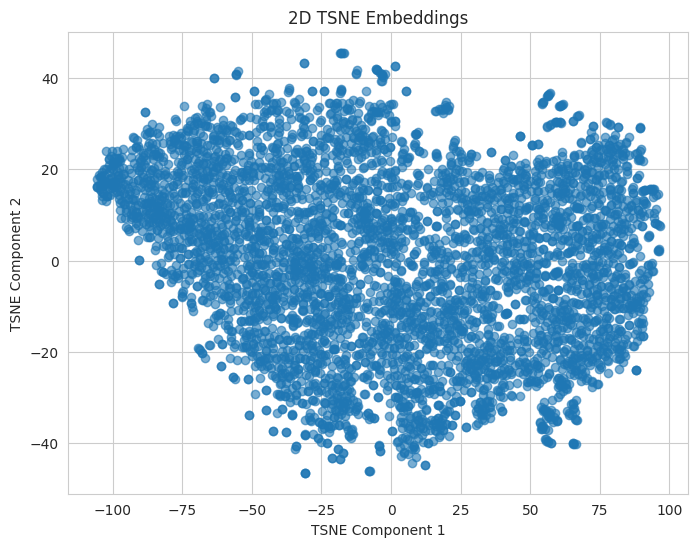

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], alpha=0.6)
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.title('2D TSNE Embeddings')
plt.grid(True)
plt.show()

<div dir="rtl">
<h2>3-2.
خوشه‌بندی
</h2>
</div>

<div dir="rtl">
<h3>3-2-1.
K-Means
</h3>

<div dir="rtl">
در این قسمت، شما ابتدا الگوریتم خوشه‌بندی K-means را
<u><b>از پایه</b></u>
 پیاده‌سازی می‌کنید.

</div>

In [ ]:
from typing import List
import random

def cluster_kmeans(emb_vecs, n_clusters, max_iter=250):
    """
    Clusters input vectors using K-means method

    Parameters
    ----------
    emb_vecs : List
        A list of vectors

    n_clusters: int
        Number of clusters

    Returns
    -------
    list
        Two lists: 1) A list containing cluster centers 2) A list containing cluster index for each input vector
    """

    # Implement K-means method from scratch
    # You can't use sklearn.cluster.KMeans for clustering
    # implement kmeans clustering here
    emb_matrix = np.array(emb_vecs)

    # Randomly initialize centroids
    initial_indices = random.sample(range(len(emb_vecs)), n_clusters)
    initial_centroids = emb_matrix[initial_indices, :]

    for _ in range(max_iter):  # You can adjust the number of iterations
        # Compute distances between data points and centroids
        distances = np.linalg.norm(emb_matrix - initial_centroids[:, np.newaxis], axis=2)

        # Assign each point to the closest centroid
        cluster_indices = np.argmin(distances, axis=0)

        print(initial_centroids)
        print(distances)
        print(cluster_indices)
        print(emb_matrix)

        new_centroids = np.array([emb_matrix[cluster_indices == k].mean(axis=0)
                                    for k in range(n_clusters)])

        # Check for convergence (if centroids don't change)
        if np.all(initial_centroids == new_centroids):
            break

        # Update centroids
        initial_centroids = new_centroids

    return initial_centroids.tolist(), cluster_indices.tolist()

<div dir="rtl">
 با استفاده از K-Means خوشه‌های اسناد را ایجاد کنید. الگوریتم را با استفاده از چند مقدار مختلف تعداد خوشه‌ها (k) اجرا کنید. در هربار اجرا، با استفاده از تعدادی از اسناد موجود در هر خوشه، موضوع آن خوشه را تعیین کرده و خوشه‌بندی حاصله را با استفاده از بردار‌های دوبعدی قسمت قبل، رسم کنید. با اینکار، پیاده‌سازی خود و همچنین کارایی این الگوریتم در خوشه‌بندی اسناد و قرار دادن اسناد مشابه در خوشه‌های یکسان را بررسی کنید.
<br>
 نمودار silhouette score برای مقدار‌های مختلف k را رسم کرده و silhouette analysis برای انتخاب k مناسب انجام دهید.
 همچنین با استفاده از داده‌های دارای برچسب، مقدار purity به ازای k را رسم کرده و مقدار purity برای k نهایی را گزارش کنید.
<br>
</div>

In [ ]:
from collections import Counter

def purity_score(y_true, y_pred):
    """
    Calculate the purity score for the given cluster assignments and ground truth classes

    y_true: list
        ground truth labels for each document

    y_pred: list
        predicted labels for each document

    Returns a purity score between 0.0 and 1.0 (higher is better)
    """
    # Create a contingency matrix
    contingency_matrix = Counter(zip(y_pred, y_true))

    # Sum the most common true class for each cluster
    purity_sum = sum([max([contingency_matrix[(cluster, true_class)] for true_class in set(y_true)]) for cluster in set(y_pred)])

    # Normalize by the total number of instances
    purity = purity_sum / len(y_true)

    return purity

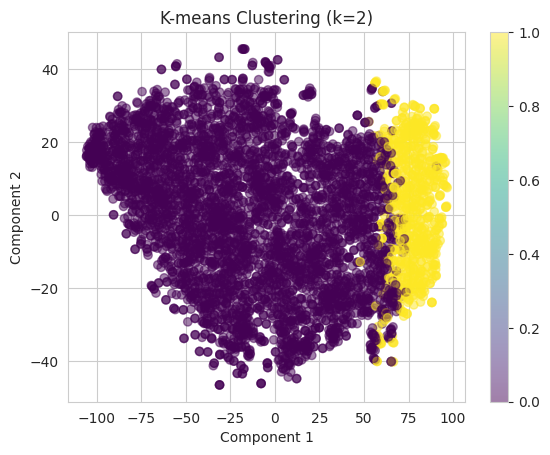

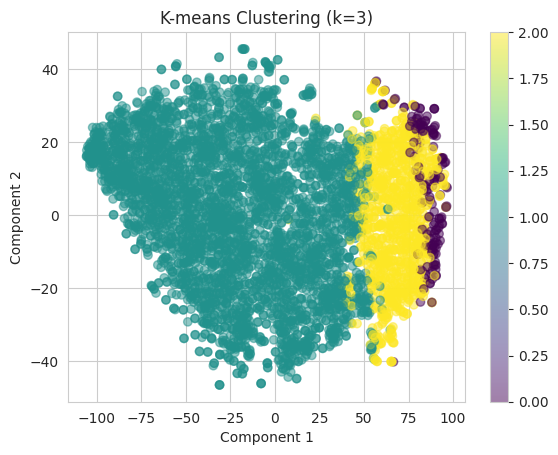

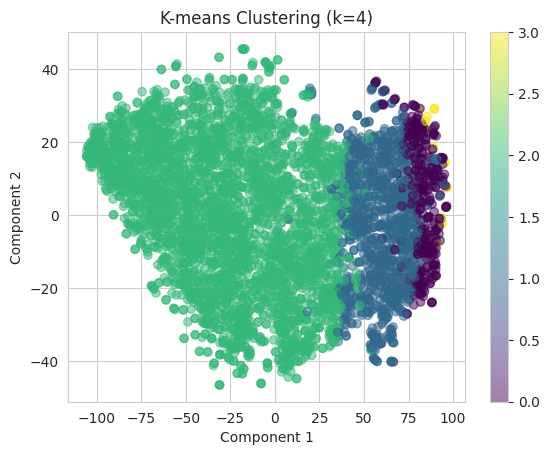

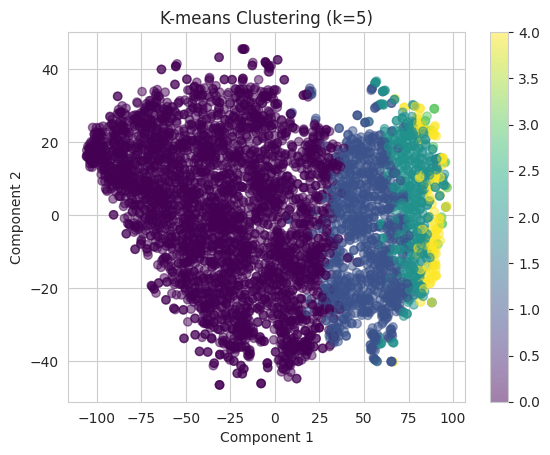

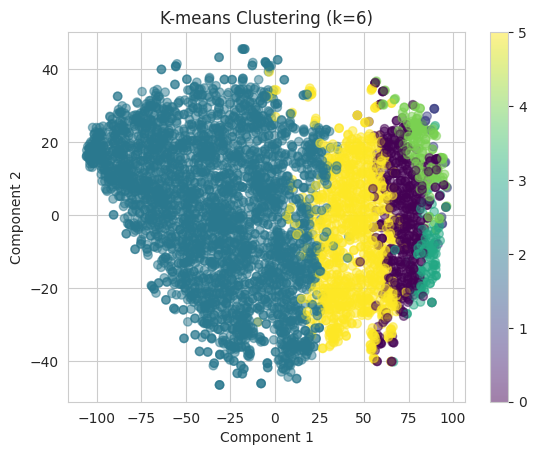

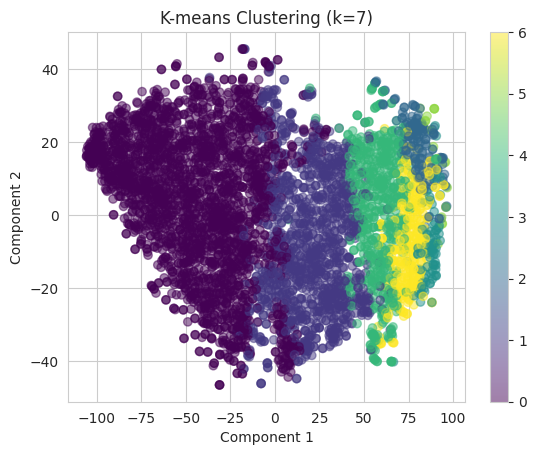

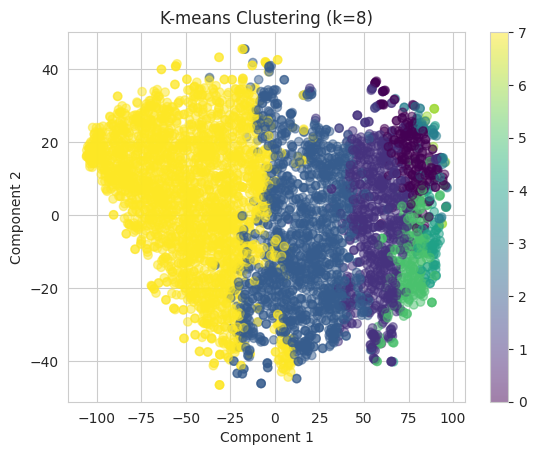

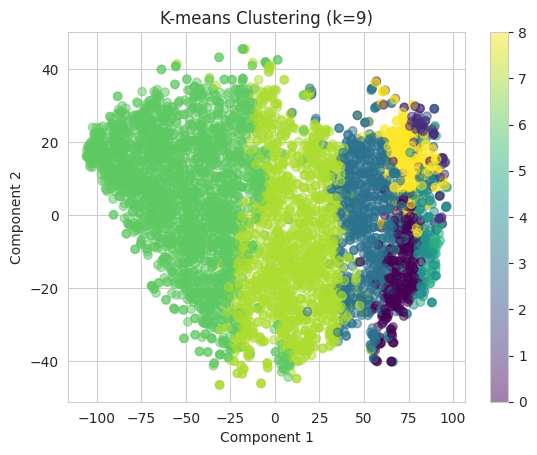

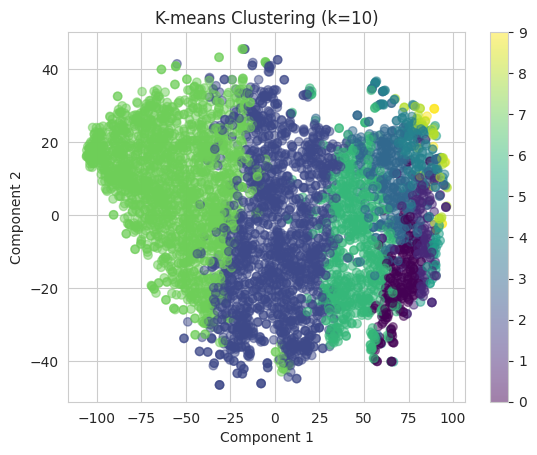

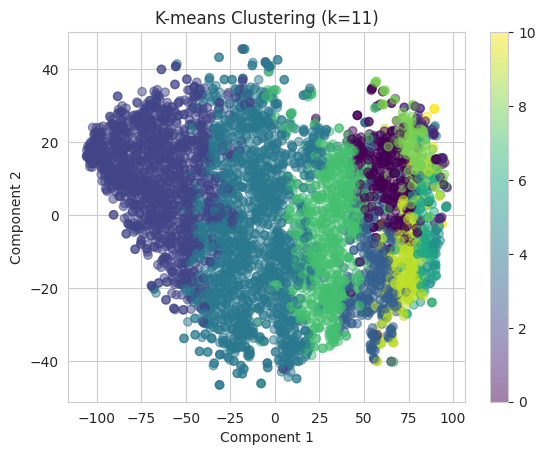

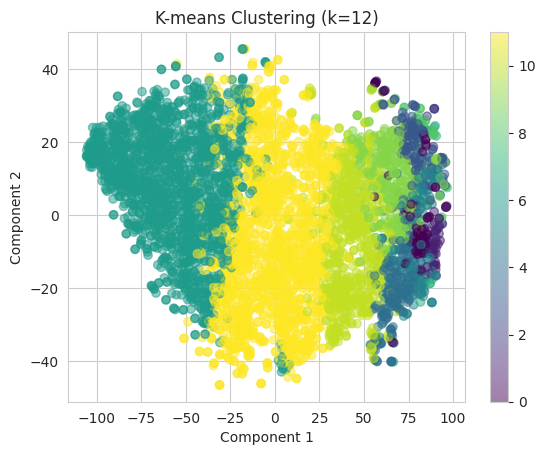

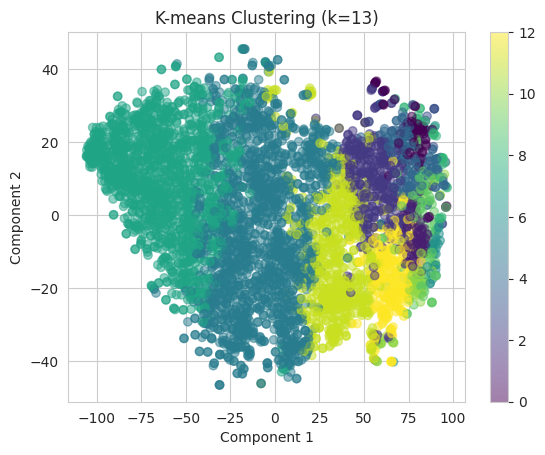

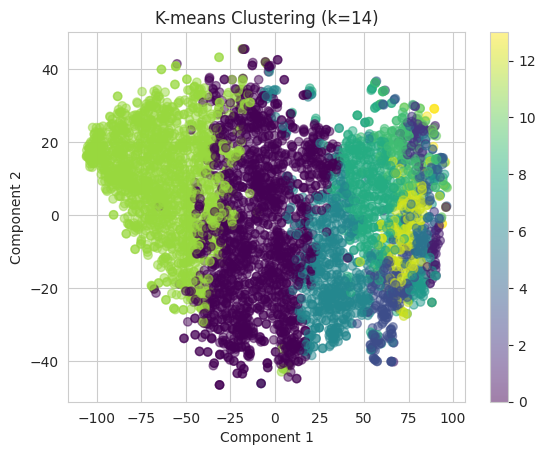

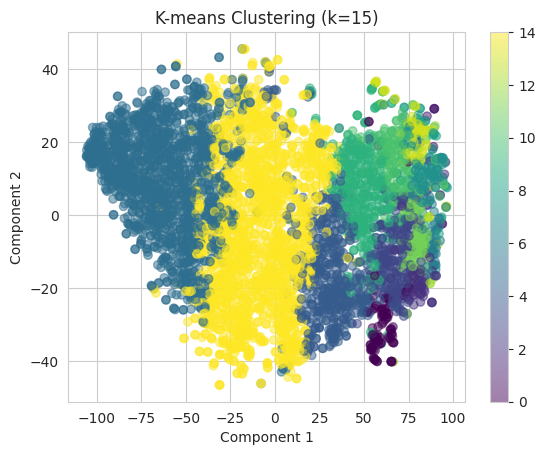

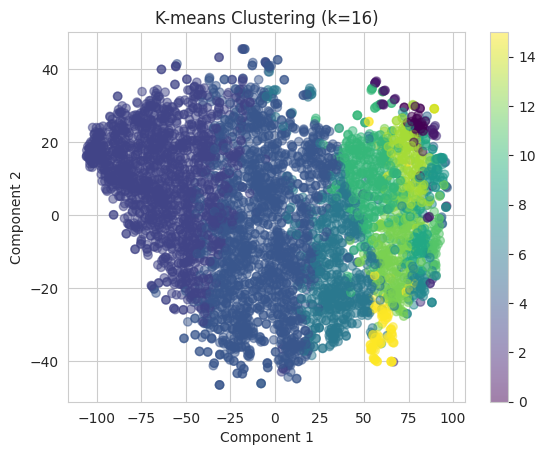

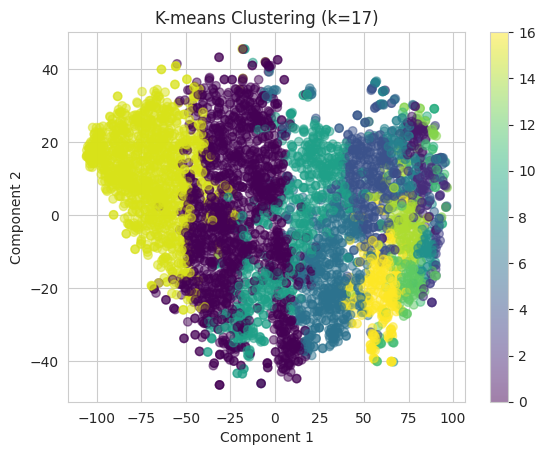

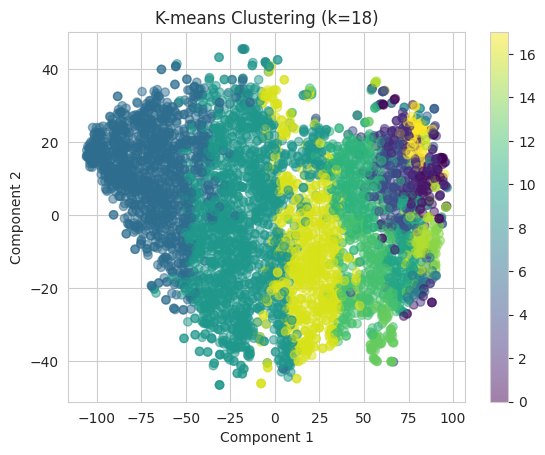

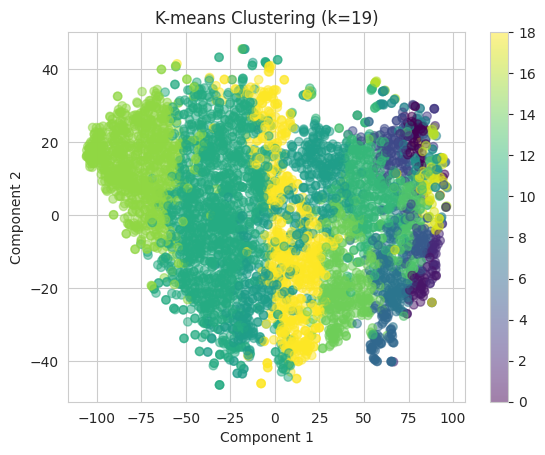

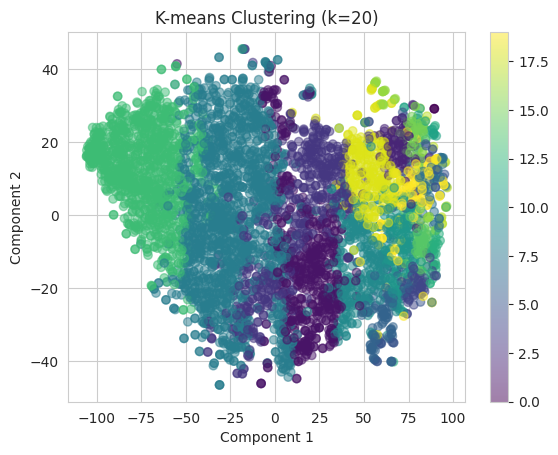

In [ ]:
def plot_clusters(X, labels, k, title=""):
    scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='viridis', alpha=0.5)
    plt.title(f"{title} (k={k})")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.colorbar(scatter)
    plt.show()

cluster_centers_list = []
cluster_labels_list = []

# Example usage
for k in range(2, 21):  # From 2 to 20
    centers, labels = cluster_kmeans(X, k)
    cluster_centers_list.append(centers)
    cluster_labels_list.append(labels)
    plot_clusters(X, labels, k, title="K-means Clustering")

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score and purity score
silhouette_scores = []
purity_scores = []

for k, labels in zip(range(2, 21), cluster_labels_list):
    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

    # Assuming Y is available and represents the ground truth labels
    purity = purity_score(Y, labels)
    purity_scores.append(purity)

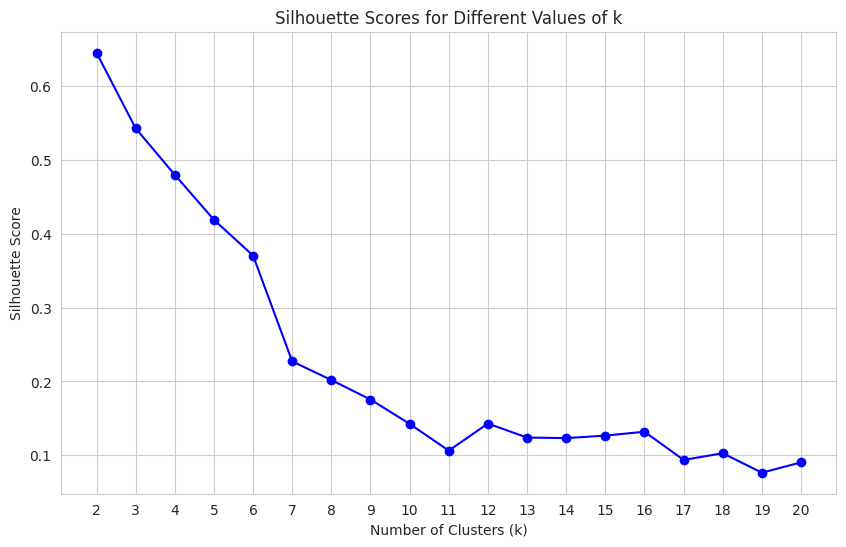

In [ ]:
# Plot silhouette score for different value of k (at least 5 different k values)
k_values = range(2, 21)  # From 2 to 20

# Plotting silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='blue')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Values of k')
plt.xticks(k_values)  # To show every k value on the x-axis
plt.grid(True)
plt.show()

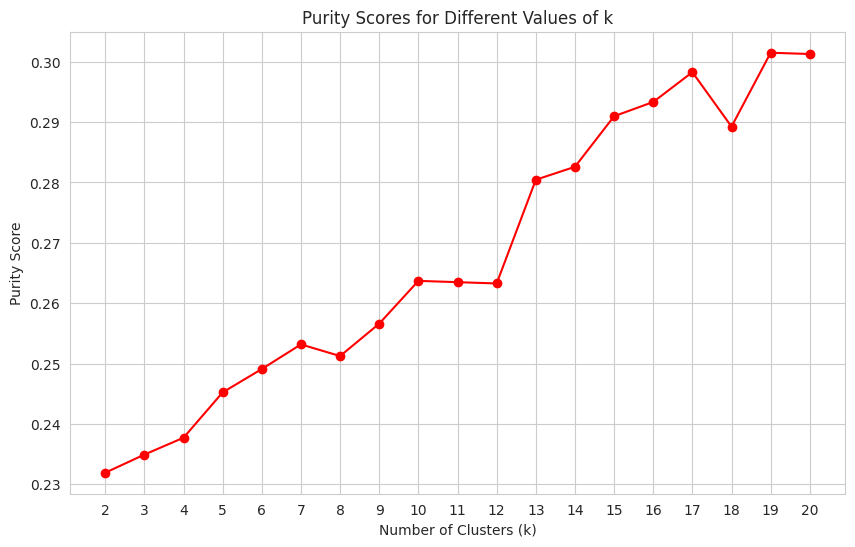

In [ ]:
# plot purity for different value of k (at least 5 different k values)
plt.figure(figsize=(10, 6))
plt.plot(k_values, purity_scores, marker='o', linestyle='-', color='red')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Purity Score')
plt.title('Purity Scores for Different Values of k')
plt.xticks(k_values)  # To show every k value on the x-axis
plt.grid(True)
plt.show()

<div dir="rtl">
با استفاده از نمودارهای رسم شده توضیح دهید بهترین k برای انتخاب در داده ما با استفاده از الگوریتم K-Means چیست؟
چرا؟
</div>

By applying the elbow method, we see that the silhouette score has a significant drop at $k=7$, and the purity score for this $k$ is $0.252$. Therefore the best value for $k$ is $7$.

In [ ]:
from scipy.stats import mode

def find_cluster_genres(X, labels, y_true, n_clusters):
    cluster_genres = []
    plt.figure(figsize=(12, 8))
    for cluster_id in range(n_clusters):
        # Find the indices of data points in this cluster
        indices = [i for i, label in enumerate(labels) if label == cluster_id]
        points = X[indices]
        # Retrieve the genres of these data points
        genres = [y_true[i] for i in indices]
        # Find the most common genre
        if genres:
            most_common_genre, _ = mode(genres)
            cluster_genres.append(most_common_genre)
        else:
            cluster_genres.append(None)

        plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {cluster_id + 1}: {categories[most_common_genre]}')
    plt.title('Cluster Genres')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend()
    plt.show()
    return cluster_genres

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


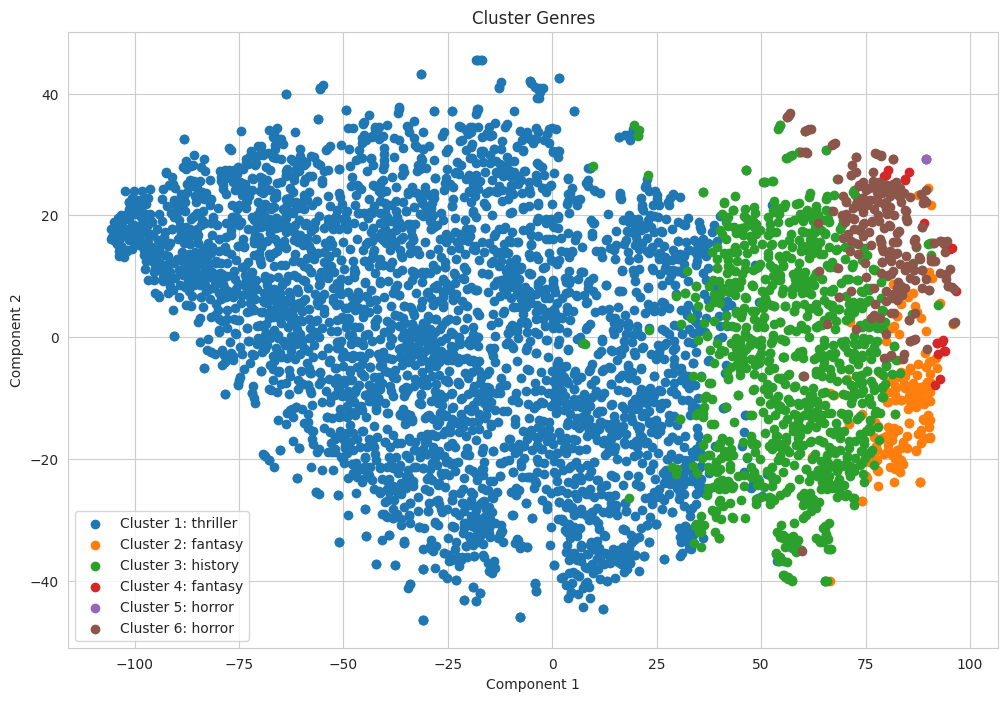

In [ ]:
# clusters, labels = Kmeans(X - X.mean(axis=0), 7)
k = 7
centroids, labels = cluster_kmeans(X, k)
cluster_genres = find_cluster_genres(X_2d, labels, Y, k)

<span style="color: red;"></span>

<div dir="rtl">
<h3>3-2-2.
Hierarchical clustering
</h3>
</div>

<div dir="rtl">
تکنیک خوشه‌بندی سلسله مراتبی یکی از تکنیک‌های خوشه‌بندی در یادگیری ماشین است. در این قسمت شما می‌توانید از لایببری scipy یا هر لایبرری دیگری در پایتون استفاده کنید تا داده‌ها را به صورت سلسله‌مراتبی خوشه‌بندی کنید. سپس می‌توانید خوشه‌ها را با matplotlib مشاهده کنید.
</div>

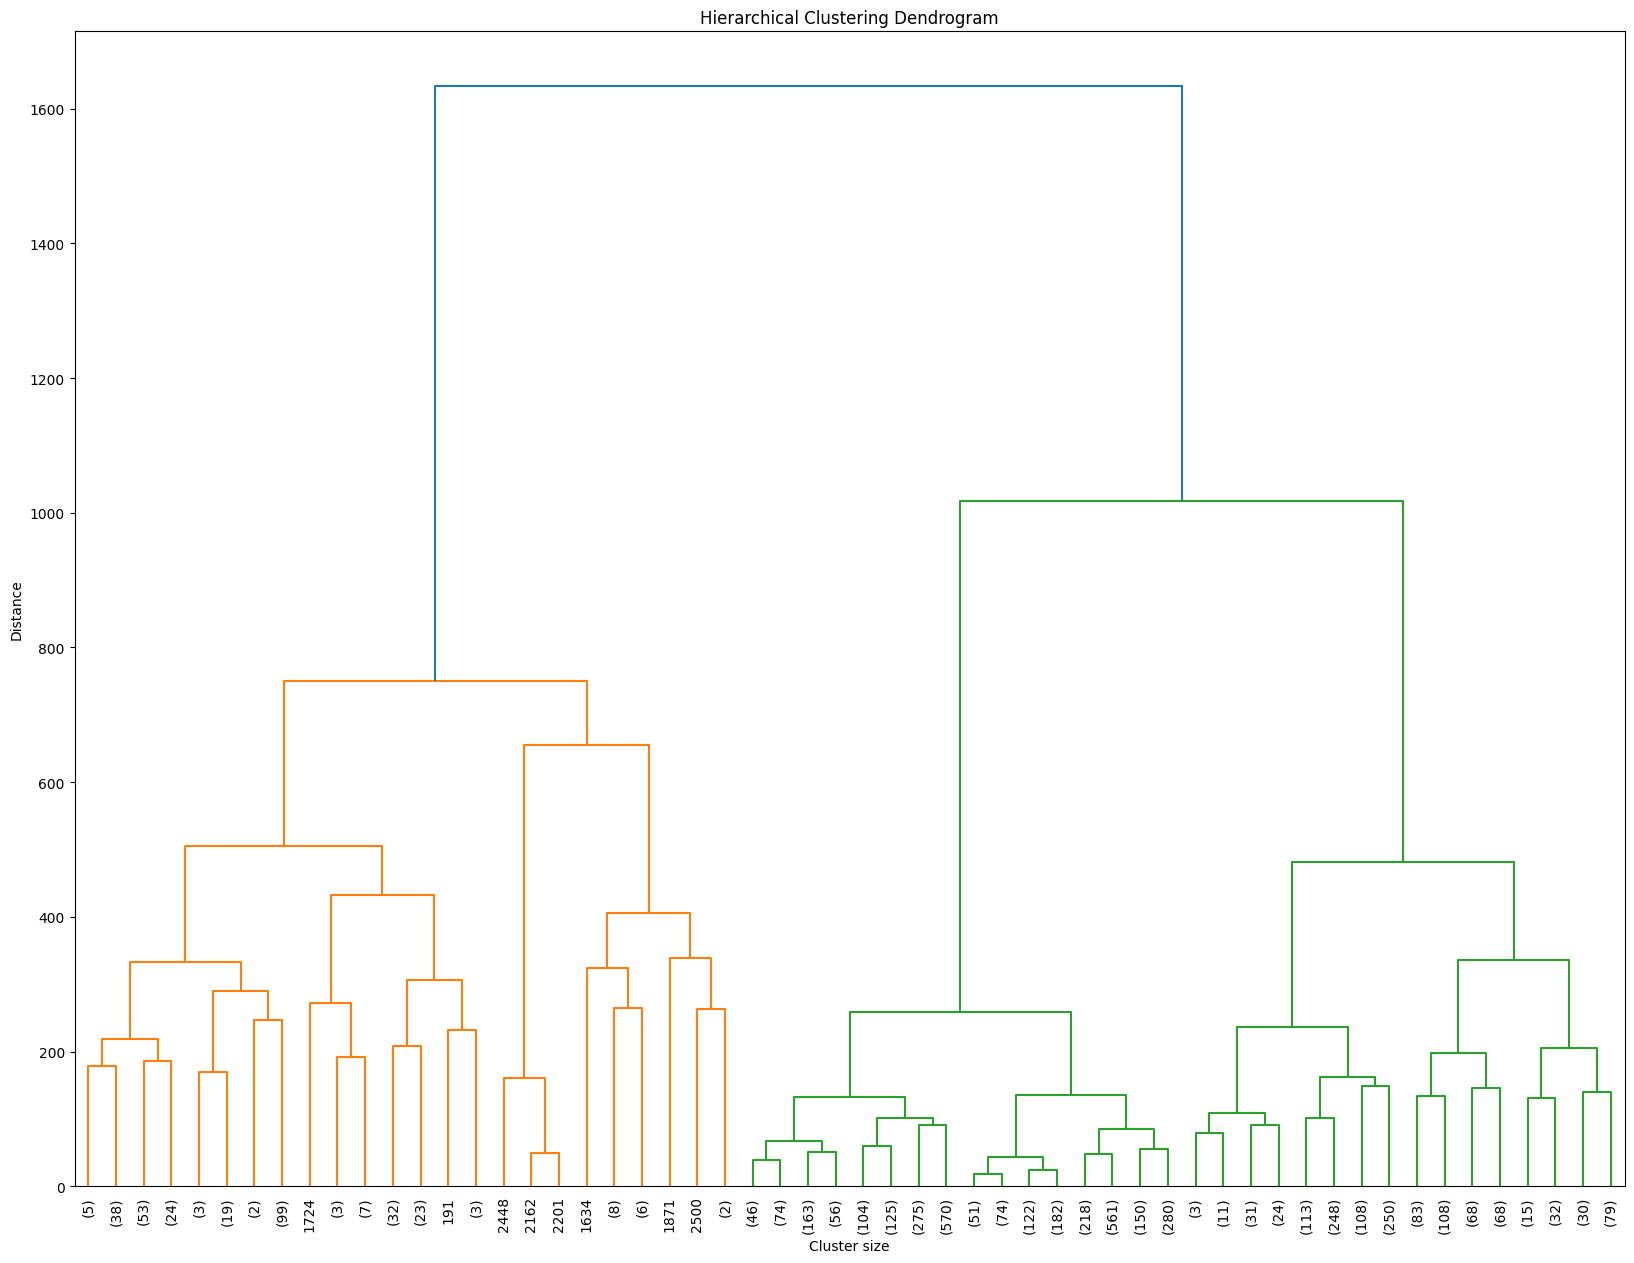

In [ ]:
# Plot dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate the linkage matrix using Ward's method
Z = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(20, 15))
dendrogram(
    Z,
    truncate_mode='level',  # show only the last p merged clusters
    p=5,  # show only the last p merged clusters
    leaf_font_size=10.,  # font size for the x axis labels
)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster size')
plt.ylabel('Distance')
plt.show()

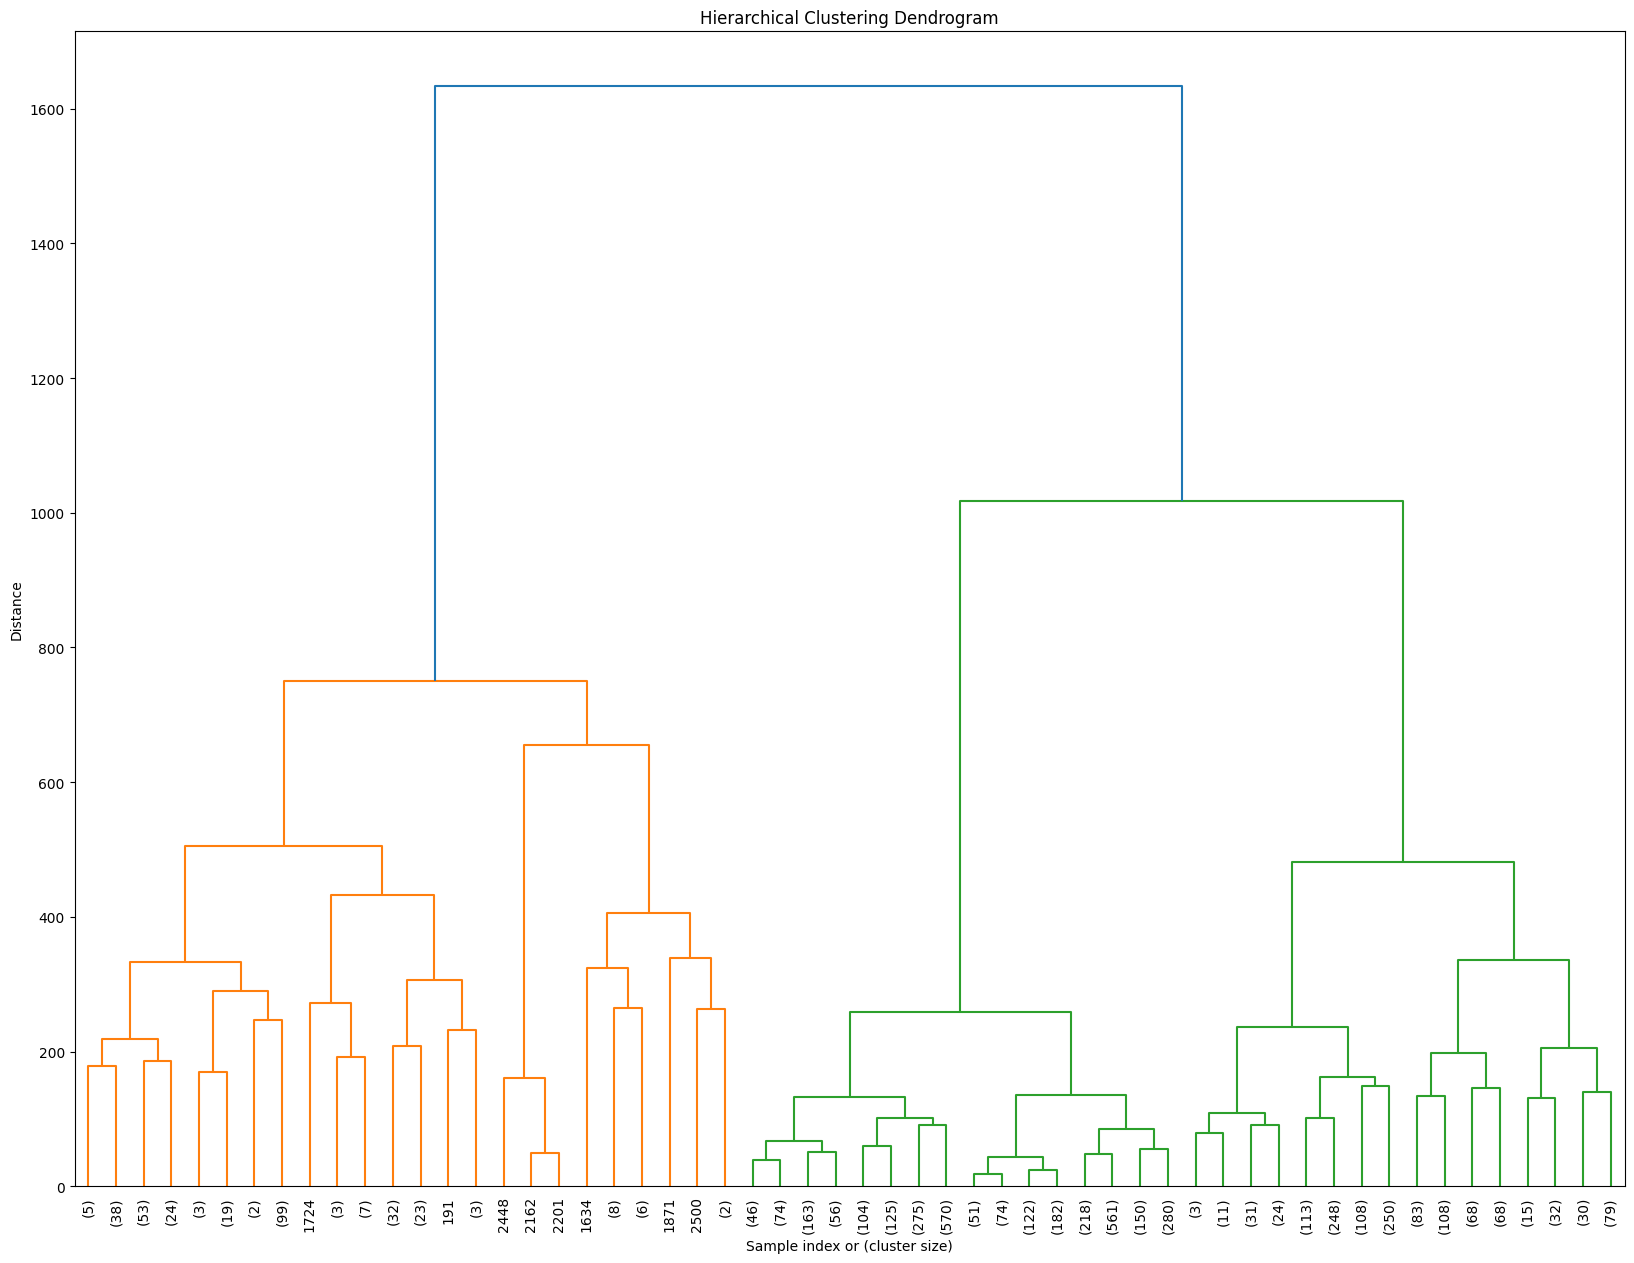

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Fit the AgglomerativeClustering with distance_threshold=0 to compute the full tree
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)

# Create the counts of samples under each node
counts = np.zeros(model.children_.shape[0])
n_samples = len(model.labels_)
for i, merge in enumerate(model.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # Leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# Create the linkage matrix
linkage_matrix = np.column_stack([model.children_, model.distances_,
                                    counts]).astype(float)

# Plot the dendrogram
plt.figure(figsize=(20, 15))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(linkage_matrix, truncate_mode='level', p=5, leaf_font_size=10.)
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
plt.show()